In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from TVL2 import *
from TVICE import *
import warnings 
warnings.filterwarnings('ignore')

# TV - Iterated Conditional Expectation

Ce notebook porte sur le débruitage d'images grâce à l'algorithme *Iterated Conditional Expectation*. Il est inspiré de l'article

[Louchet, C.,  Moisan, L., *Total variation denoising using iterated conditional expectation*. In 2014 22nd European Signal Processing Conference (EUSIPCO) (pp. 1592-1596). 2014](https://hal.archives-ouvertes.fr/hal-01214735)

Voir le sujet PDF associé pour plus de détails.

In [6]:
lambd = 20     # TV regularization parameter 
sig = 0.05  # noise standard deviation

In [15]:
# image creation
n = 100    # start with small images for your experimentations
i = 100
u = plt.imread('./images/simpson512.png')
u = u[:,:,1]
#u = u[i:i+n,i:i+n]
nr,nc = u.shape

# add noise
ub = u + sig*np.random.randn(nr,nc)
noise = np.random.rand(nr,nc)

# TV-MAP
u_tvmap = chambolle_pock_prox_TV1(ub,sig**2*lambd,100)

<Figure size 720x720 with 0 Axes>

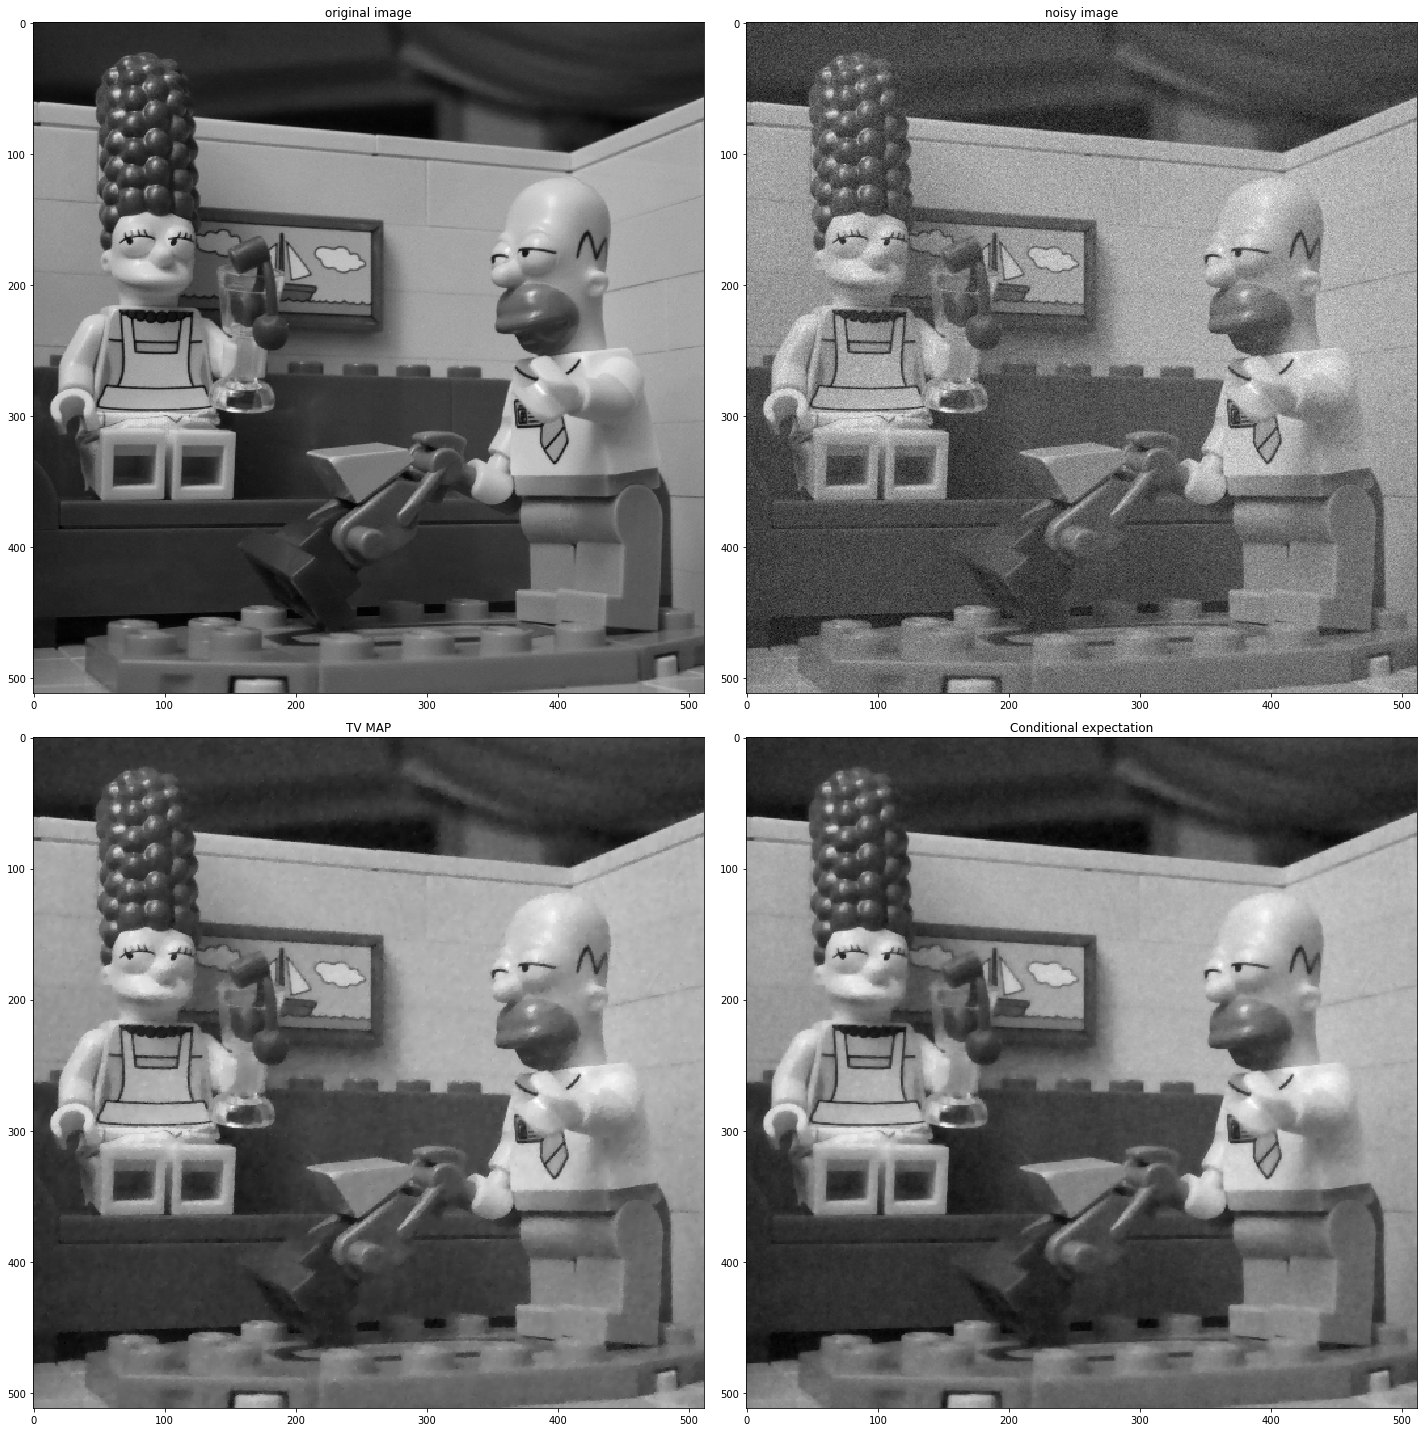

<Figure size 720x720 with 0 Axes>

In [16]:
## denoise ub using the TV-ICE scheme
out = tvice(ub,sig,lambd,100)

## display
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes[0,0].imshow(u,cmap='gray')
axes[0,0].set_title('original image')
axes[0,1].imshow(ub,cmap='gray')
axes[0,1].set_title('noisy image')
axes[1,0].imshow(u_tvmap,cmap='gray')
axes[1,0].set_title('TV MAP')
axes[1,1].imshow(out,cmap='gray')
axes[1,1].set_title('Conditional expectation')
fig.tight_layout()
plt.figure(figsize = (10,10))